In [1]:
import os
import torch
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

os.environ['CUDA_VISIBLE_DEVICE'] = str("0")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import argparse

parser = argparse.ArgumentParser(description="Hyper-parameters for nn model")
parser.add_argument("--epochs", default=25, type=int, help="Numbers of epoch")
parser.add_argument("--batch_size", default=72, type=int, help="Batch size")
parser.add_argument("--lr", default=1e-3, type=float, help="learning rate")
parser.add_argument("--data_path", type=str, help="Path to data (if not exist, create it)")

args = parser.parse_args([])

In [3]:
args.data_path = "/data/seanyu/F_MNIST_data/"

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST(args.data_path, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args.batch_size, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST(args.data_path, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=args.batch_size, shuffle=True)

In [5]:
image, label = next(iter(trainloader))

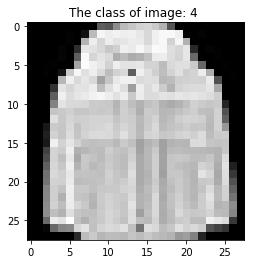

In [6]:
idx = 0
plt.imshow(image.numpy()[idx][0,:,:], cmap = 'gray')
plt.title("The class of image: %i " % label.numpy()[idx])
plt.show()

In [7]:
from torch import nn, optim
import torch.nn.functional as F

In [8]:
class Simple_dnn_graph_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x 

In [9]:
model = Simple_dnn_graph_model()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
loss_fn = nn.NLLLoss() # cross-entropy, but in single-value encoding (non-onehot)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

# Check the model is in training mode
model.train()

cuda


Simple_dnn_graph_model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

In [11]:
history_loss = []
history_acc = []
for epoch in range(args.epochs):
    epoch_loss = []
    running_acc = []
    for image, label in tqdm(trainloader):
        y_pred = model(image.cuda())
        
        loss = loss_fn(y_pred, label.cuda())
        epoch_loss.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        this_acc = sum(y_pred.argmax(dim=1).cpu().numpy() == label.numpy()) / len(y_pred)
        running_acc.append(this_acc) 
    print("EPOCH: %i\tloss: %.4f\taccuracy: %.4f" % (epoch+1, np.mean(epoch_loss), np.mean(running_acc)))
    history_loss.append(np.mean(epoch_loss))
    history_acc.append(np.mean(running_acc))

  2%|▏         | 13/834 [00:00<00:06, 121.22it/s]

EPOCH: 1	loss: 0.6892	accuracy: 0.7454


  1%|▏         | 12/834 [00:00<00:06, 119.72it/s]

EPOCH: 2	loss: 0.4150	accuracy: 0.8478


  2%|▏         | 13/834 [00:00<00:06, 120.86it/s]

EPOCH: 3	loss: 0.3669	accuracy: 0.8643


  2%|▏         | 13/834 [00:00<00:06, 124.62it/s]

EPOCH: 4	loss: 0.3423	accuracy: 0.8729


  2%|▏         | 13/834 [00:00<00:06, 121.50it/s]

EPOCH: 5	loss: 0.3163	accuracy: 0.8832


  1%|▏         | 12/834 [00:00<00:06, 118.99it/s]

EPOCH: 6	loss: 0.3019	accuracy: 0.8891


  2%|▏         | 13/834 [00:00<00:06, 120.88it/s]

EPOCH: 7	loss: 0.2887	accuracy: 0.8932


  1%|▏         | 12/834 [00:00<00:06, 117.62it/s]

EPOCH: 8	loss: 0.2774	accuracy: 0.8982


  2%|▏         | 13/834 [00:00<00:06, 120.79it/s]

EPOCH: 9	loss: 0.2666	accuracy: 0.9016


  1%|▏         | 12/834 [00:00<00:06, 119.16it/s]

EPOCH: 10	loss: 0.2572	accuracy: 0.9043


  2%|▏         | 13/834 [00:00<00:06, 124.33it/s]

EPOCH: 11	loss: 0.2470	accuracy: 0.9076


  1%|▏         | 12/834 [00:00<00:06, 118.94it/s]

EPOCH: 12	loss: 0.2382	accuracy: 0.9113


  1%|▏         | 12/834 [00:00<00:06, 118.39it/s]

EPOCH: 13	loss: 0.2305	accuracy: 0.9135


  1%|▏         | 12/834 [00:00<00:07, 116.26it/s]

EPOCH: 14	loss: 0.2241	accuracy: 0.9163


  2%|▏         | 13/834 [00:00<00:06, 122.38it/s]

EPOCH: 15	loss: 0.2174	accuracy: 0.9191


  2%|▏         | 13/834 [00:00<00:06, 125.87it/s]

EPOCH: 16	loss: 0.2129	accuracy: 0.9210


  2%|▏         | 13/834 [00:00<00:06, 125.89it/s]

EPOCH: 17	loss: 0.2051	accuracy: 0.9236


  1%|▏         | 12/834 [00:00<00:06, 119.71it/s]

EPOCH: 18	loss: 0.1995	accuracy: 0.9256


  1%|▏         | 12/834 [00:00<00:06, 119.32it/s]

EPOCH: 19	loss: 0.1954	accuracy: 0.9272


  1%|▏         | 12/834 [00:00<00:06, 119.92it/s]

EPOCH: 20	loss: 0.1892	accuracy: 0.9283


  1%|▏         | 12/834 [00:00<00:06, 118.81it/s]

EPOCH: 21	loss: 0.1829	accuracy: 0.9302


  2%|▏         | 13/834 [00:00<00:06, 122.07it/s]

EPOCH: 22	loss: 0.1767	accuracy: 0.9335


  2%|▏         | 13/834 [00:00<00:06, 122.86it/s]

EPOCH: 23	loss: 0.1763	accuracy: 0.9332


  1%|          | 10/834 [00:00<00:08, 98.03it/s]

EPOCH: 24	loss: 0.1673	accuracy: 0.9377


100%|██████████| 834/834 [00:07<00:00, 119.07it/s]

EPOCH: 25	loss: 0.1641	accuracy: 0.9380


In [12]:
# Switch to evaluation mode
model.eval()

test_prediction = []
test_label = []
for im_test, label_test in tqdm(testloader):
    y_pred = torch.exp(model(im_test.cuda()))
    
    test_prediction.append(y_pred.cpu().detach().numpy())
    test_label.append(label_test.numpy())

test_prediction = np.concatenate(test_prediction)
test_label = np.concatenate(test_label)

test_accuracy = np.sum(test_prediction.argmax(axis = 1) == test_label) / len(test_prediction)
print("Testing accuracy: %.4f" % (test_accuracy))

100%|██████████| 139/139 [00:00<00:00, 140.04it/s]

Testing accuracy: 0.8845


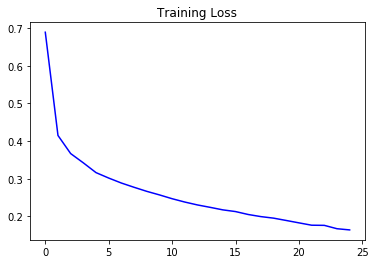

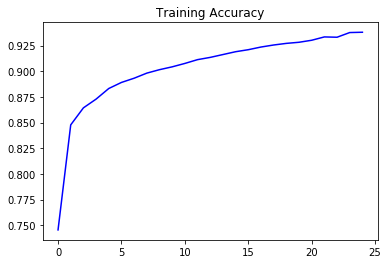

In [13]:
plt.plot(range(len(history_loss)), history_loss, 'b-')
plt.title("Training Loss")
plt.show()

plt.plot(range(len(history_acc)), history_acc, 'b-')
plt.title("Training Accuracy")
plt.show()